#End-to-End Loan Eligibility Classification

The goal of this project will be to determine loan eligiblity based on a number of features. The intention is to go through all necessary steps of a machine learning classification problem from start to finish.

# Parameter Tuning


Let us see if we can improve upon the accuracy of our classifier using some basic parameter tuning before we evaluate on the test set:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

final_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('classifier', xgb.XGBClassifier(random_state=42, device='cpu'))
])

tuning_params = {
    'classifier__n_estimators':randint(80, 1000),
    'classifier__max_depth':randint(5, 20),
    'classifier__learning_rate':[0.001, 0.003, 0.01, 0.03, 0.1, 0.2, 0.3]
}

random_search = RandomizedSearchCV(final_pipeline,
                                   param_distributions=tuning_params,
                                   n_iter=10, cv=3, random_state=42)

random_search.fit(loan_data, loan_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(force_int_remainder_cols=False,
                                                                remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='most_frequent')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('log',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('functiontransfo...
                                                            num_parallel_tree=None,
                                                            random_state=42, ...))]),
                   param_distributions={'classifier__learning_rate': [0.001,
                                                                      0.003,
                                                                      0.01,
                                                                      0.03, 0.1,
                                                                      0.2,
                                                                      0.3],
                                        'classifier__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x799a6342e2c0>,
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x799a6276aec0>},
                   random_state=42)

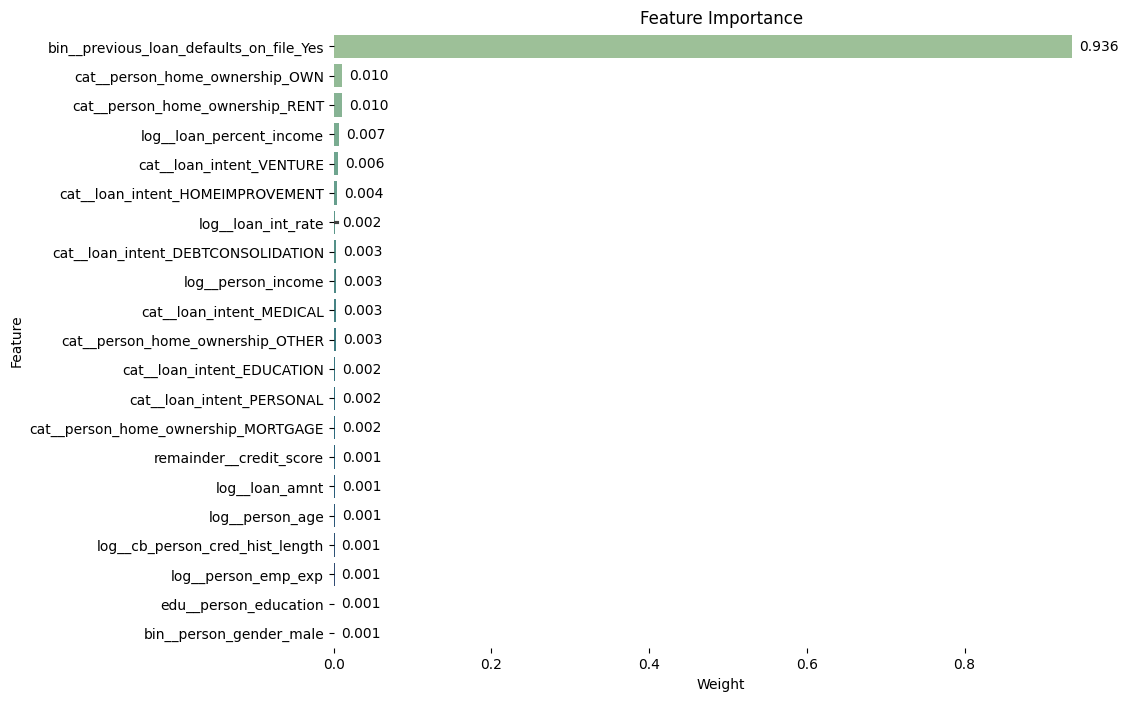

In [ ]:
final_model = random_search.best_estimator_
feature_weights = final_model['classifier'].feature_importances_
feature_names = final_model['preprocessing'].get_feature_names_out()

feature_weights_df = pd.DataFrame({'Feature': feature_names,
                                   'Weight': feature_weights}).sort_values('Weight',
                                                                           ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Weight', y='Feature', data=feature_weights_df,
                 palette='crest', hue='Feature')
sns.despine(left=True, bottom=True)
for p in ax.patches:
    ax.annotate(
        f'{p.get_width():.3f}',
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha='left', va='center', xytext=(5, 0), textcoords='offset points',
        fontsize=10
    )
plt.title('Feature Importance')
plt.show()